 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_en_trimestres.xlsx')

In [3]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8


In [4]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras.iloc[:,3]
y

0              Más de 2 años
1           Entre 1 y 2 años
2           Entre 1 y 2 años
3              Más de 2 años
4      Entre 9 meses y 1 año
               ...          
929            Hasta 3 meses
930            Hasta 3 meses
931            Hasta 3 meses
932            Hasta 3 meses
933            Hasta 3 meses
Name: plazo_trimestres, Length: 883, dtype: object

In [7]:
# Al ser una variable categórica la vamos a transformar

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras['Encoded'] = y

## FEATURES

In [8]:
tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12,5,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1,5,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Hasta 3 meses,2325.368,8,4,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Hasta 3 meses,1984.627,8,4,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Hasta 3 meses,6557.067,9,4,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Hasta 3 meses,22279.428,15,4,0,0,1,0,0,0,0


In [9]:
x = obras.iloc[:,4:]
x

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,5,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,5,0,0,1,0,0,0,0
4,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,4,0,0,1,0,0,0,0
930,1984.627,8,4,0,0,1,0,0,0,0
931,6557.067,9,4,0,0,1,0,0,0,0
932,22279.428,15,4,0,0,1,0,0,0,0


In [10]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x = x.drop(['Encoded'],axis=1)
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [11]:
obras['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [12]:
y.shape

(883,)

In [13]:
#tipo_obras_upsampled = pd.get_dummies(obras_upsampled.tipo)
#obras_upsampled = obras_upsampled.join(tipo_obras_upsampled)
#x = obras.iloc[:,4:]
#x = x.drop(['plazo_meses'],axis=1)

In [14]:
x.shape

(883, 9)

## PRE PROCESAMIENTO

In [15]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [16]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (618, 9)
Se corresponde con el "Y" de entrenamiento (618,)


In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xtrain)

In [18]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [19]:
xtrain_scaled.shape

(618, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [ ]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

In [ ]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

In [ ]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

In [24]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [27]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

In [ ]:
print(classification_report(ytest, ypred_svc))

### KNN Classifier

In [20]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [21]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 5}
El score obtenido fue:  0.39169944925255706
El accuracy obtenido fue de 0.42 


In [28]:
rdos = rdos.append({'Clasificador':'KNN',
                    'Accuracy': score_knn}, ignore_index=True)

In [29]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [30]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

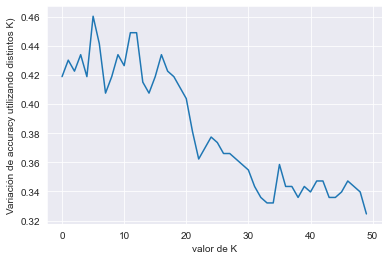

In [32]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [ ]:
# Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. 

rdos

### Random Forest Classifier

In [33]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [34]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 100}
El score obtenido fue:  0.4110542879622344
El accuracy obtenido fue de 0.42 


In [35]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [36]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868


### Logistic Regression 

In [37]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [38]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 50}
El score obtenido fue:  0.40778914240755304
El accuracy obtenido fue de 0.46 


In [39]:
rdos = rdos.append({'Clasificador':'LR',
                   'Accuracy': score_lr}, ignore_index=True)

In [40]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868
2,LR,0.456604


### One Vs Rest Classifier (SVM)

In [41]:
# Al ser un problema de clasificación multiclase, probamos con OVO y OVR

ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [42]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR',
                   'Accuracy': score_ovr}, ignore_index=True)

In [43]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868
2,LR,0.456604
3,OVR,0.366038


### One Vs One Classifier (SVM)

In [44]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [45]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.3320754716981132

In [46]:
rdos = rdos.append({'Clasificador':'OVO',
                   'Accuracy': score_ovo}, ignore_index=True)

In [47]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868
2,LR,0.456604
3,OVR,0.366038
4,OVO,0.332075


## Resultados / Visualización

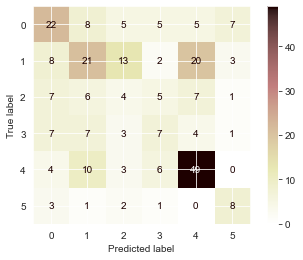

In [48]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            #display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=0)
sns.set_style('dark')

In [ ]:
print(classification_report(ytest, ypred_rfr))

## Balanceamos

In [49]:
obras['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [50]:
obras['Encoded'].value_counts()

4    269
1    186
0    179
2    104
3     96
5     49
Name: Encoded, dtype: int64

In [51]:
from sklearn.utils import resample

# Primero separamos las clases

obras1 = obras[obras.Encoded==4]
obras2 = obras[obras.Encoded==1]
obras3 = obras[obras.Encoded==0]
obras4 = obras[obras.Encoded==2]
obras5 = obras[obras.Encoded==3]
obras6 = obras[obras.Encoded==5]

# Generamos samples para que las 4 clases tengan el mismo peso

obras1_upsampled = resample(obras1, replace=True, n_samples=269, random_state=8)
obras2_upsampled = resample(obras2, replace=True, n_samples=269, random_state=8)
obras3_upsampled = resample(obras3, replace=True, n_samples=269, random_state=8)
obras4_upsampled = resample(obras4, replace=True, n_samples=269, random_state=8)
obras5_upsampled = resample(obras5, replace=True, n_samples=269, random_state=8)
obras6_upsampled = resample(obras6, replace=True, n_samples=269, random_state=8)

# Combinamos todas las clases y contamos los valores

obras_upsampled = pd.concat([obras1_upsampled,obras2_upsampled,obras3_upsampled,obras4_upsampled,obras5_upsampled,obras6_upsampled])

obras_upsampled['Encoded'].value_counts()

5    269
4    269
3    269
2    269
1    269
0    269
Name: Encoded, dtype: int64

In [52]:
y = obras_upsampled.iloc[:,3]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras_upsampled['Encoded'] = y

In [53]:
x = obras_upsampled.iloc[:,4:]
x = x.drop(['Encoded'],axis=1)

In [54]:
y.shape

(1614,)

In [55]:
x.shape

(1614, 9)

In [56]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (1129, 9)
Se corresponde con el "Y" de entrenamiento (1129,)


In [57]:
scaler = preprocessing.StandardScaler().fit(xtrain)

In [58]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [59]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [60]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.7653018682399214
El accuracy obtenido fue de 0.87 


In [61]:
rdos = rdos.append({'Clasificador':'KNN - ups',
                    'Accuracy': score_knn}, ignore_index=True)

In [62]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868
2,LR,0.456604
3,OVR,0.366038
4,OVO,0.332075
5,KNN - ups,0.872165


In [63]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [64]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 100}
El score obtenido fue:  0.7670914454277286
El accuracy obtenido fue de 0.86 


In [65]:
rdos = rdos.append({'Clasificador':'Random Forest - ups',
                   'Accuracy': score_rfr}, ignore_index=True)

In [66]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [67]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 150}
El score obtenido fue:  0.3472448377581121
El accuracy obtenido fue de 0.40 


In [68]:
rdos = rdos.append({'Clasificador':'LR - ups',
                   'Accuracy': score_lr}, ignore_index=True)

In [69]:
ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [70]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR - ups',
                   'Accuracy': score_ovr}, ignore_index=True)

In [71]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [72]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.3711340206185567

In [73]:
rdos = rdos.append({'Clasificador':'OVO - ups',
                   'Accuracy': score_ovo}, ignore_index=True)

In [74]:
rdos

,Clasificador,Accuracy
0,KNN,0.418868
1,Random Forest,0.418868
2,LR,0.456604
3,OVR,0.366038
4,OVO,0.332075
5,KNN - ups,0.872165
6,Random Forest - ups,0.859794
7,LR - ups,0.402062
8,OVR - ups,0.422680
9,OVO - ups,0.371134


In [75]:
from sklearn.metrics import plot_confusion_matrix


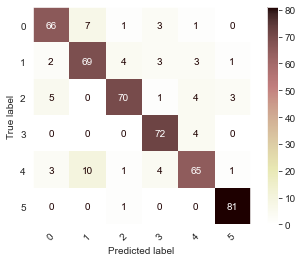

In [76]:
disp = plot_confusion_matrix(gs_knn, xtest_scaled, ytest,
                            #display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45)

In [77]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        78
           1       0.78      0.78      0.78        82
           2       0.88      0.82      0.85        83
           3       0.89      0.95      0.92        76
           4       0.84      0.80      0.82        84
           5       0.91      0.99      0.95        82

    accuracy                           0.86       485
   macro avg       0.86      0.86      0.86       485
weighted avg       0.86      0.86      0.86       485

